In [117]:
import pandas as pd

In [118]:
import qgrid

In [119]:
idx = pd.IndexSlice

In [120]:
import sys
reload (sys)
sys.setdefaultencoding('utf-8')
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [121]:
qgrid.nbinstall(overwrite=True) 

In [126]:
titles = pd.read_csv('titles.csv', index_col=None)

In [127]:
h = titles.head()

In [50]:
df = qgrid.show_grid(titles)

In [128]:
type(titles)

pandas.core.frame.DataFrame

In [129]:
titles.shape # Number of movies: 231351

(231351, 2)

In [130]:
titles.sort_values('year')[:3] # three earliest movies

,title,year
177015,Miss Jerry,1894
214352,The Startled Lover,1898
123994,Reproduction of the Corbett and Jeffries Fight,1899


In [138]:
tf = titles.sort('year')
tf.head(2)

,title,year
177015,Miss Jerry,1894
214352,The Startled Lover,1898


In [139]:
tf.tail(2)

,title,year
102105,Settling of Score,2026
65220,War in Snow,2026


In [131]:
titles.sort_values('year')[-3:] # three latest movies 

,title,year
71656,Gods Heart,2025
102105,Settling of Score,2026
65220,War in Snow,2026


In [142]:
h['year'] //10 * 10 # decades, first slice to divide and second to truncate

0    1990
1    1960
2    1990
3    2000
4    2010
Name: year, dtype: int64

In [143]:
h.year > 1985 # comparison gives boolians

0     True
1    False
2     True
3     True
4     True
Name: year, dtype: bool

In [144]:
h[h.year>1985] # how many movies after 1985

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [145]:
h[(h.year<1985) and (h.year>=1990)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [147]:
h[(h.year<1985) | (h.year>=1990)] # 'and' uses &

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [151]:
Hamlet = titles[titles.title == 'Hamlet'].sort('year')
Hamlet.head()

,title,year
46533,Hamlet,1910
208977,Hamlet,1911
165689,Hamlet,1913
98126,Hamlet,1921
6003,Hamlet,1948


In [152]:
len(Hamlet)

18

In [154]:
Hamlet.tail(5)

,title,year
94139,Hamlet,2000
175341,Hamlet,2009
102456,Hamlet,2011
222606,Hamlet,2014
168240,Hamlet,2015


In [60]:
import matplotlib as plt
%matplotlib inline

In [167]:
titles.year.value_counts().head() # not sorted by year

2016    11090
2017     8733
2015     8676
2014     8080
2013     7684
Name: year, dtype: int64

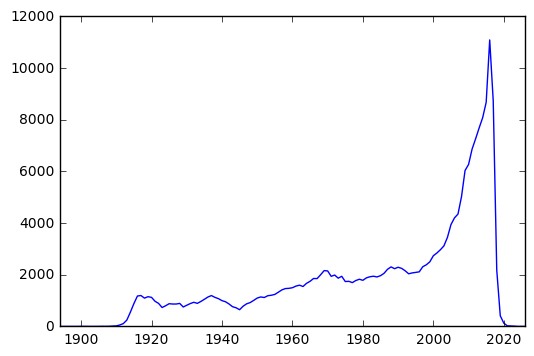

In [62]:
titles.year.value_counts().sort_index().plot()

In [106]:
movies_1950 = titles[titles.year == 1950]
len(movies_1950)

1099

In [114]:
movies_2016 = titles[titles.year == 2016]
len(movies_2016)

11090

In [158]:
cast = pd.read_csv('cast.csv')

In [159]:
hc = cast.head(10)

In [160]:
hc[hc.n.notnull()]

,title,year,name,type,character,n
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0


In [161]:
hc.n.isnull().values.sum()

7

In [162]:
hc.n.notnull().values.sum()

3

In [78]:
cast = cast.fillna('')

In [165]:
hc[hc.title.str.startswith('Battle')]

,title,year,name,type,character,n
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


In [173]:
c_char = cast[cast.character.str.startswith('Kermit the Frog')]
len(c_char)

10

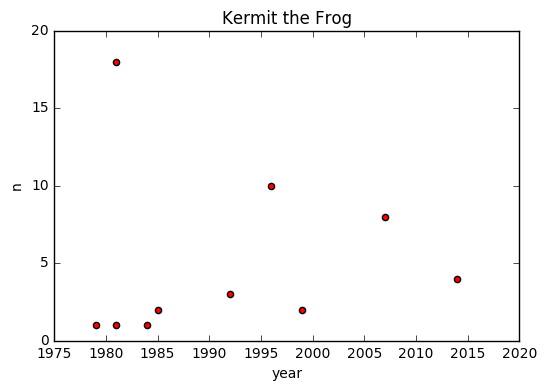

In [178]:
c_char.plot(x = 'year', y= 'n', kind = 'scatter', marker = 'o', color = 'red', title = "Kermit the Frog")

In [190]:
%time 
cast[cast.title == 'Sleuth'] # why time is not working?

,title,year,name,type,character,n
251028,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
315589,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
315590,Sleuth,2007,Michael Caine,actor,Andrew,1.0
361404,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
361405,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1250467,Sleuth,2007,Jude Law,actor,Milo,2.0
1400595,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1416730,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1648990,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1746091,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [187]:
%%time?

In [76]:
cast.shape

(3621779, 6)

In [192]:
ci = cast.set_index('title').sort_index() # it takes quite a while becasue its sorting through values

In [193]:
ci.loc['Sleuth'] # now very fast

,year,name,type,character,n
title,,,,,
Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,2007,Jude Law,actor,Milo,2.0
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN


In [194]:
ci_yr_and_ti = cast.set_index(['title', 'year']).sort_index()

In [197]:
ci_yr_and_ti.loc['Sleuth', 1972]

name     type                   character    n
title  year                                                              
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2.0
       1972      Alec Cawthorne    actor           Inspector Doppler  3.0
       1972        Teddy Martin    actor      Police Constable Higgs  6.0
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier    actor                 Andrew Wyke  1.0
       1972  Eve (III) Channing  actress             Marguerite Wyke  5.0

In [198]:
ci_yr_and_ti_reset = ci_yr_and_ti.reset_index(['title', 'year']) #resetting indexes 
ci_yr_and_ti_reset.head()

,title,year,name,type,character,n
0,#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17.0
1,#1 Serial Killer,2013,Aaron Aoki,actor,Plastic Bag Victim,21.0
2,#1 Serial Killer,2013,Zachary (X) Brown,actor,Africian American Teen,18.0
3,#1 Serial Killer,2013,Yvis Cannavale,actor,Homeless Man,25.0
4,#1 Serial Killer,2013,Patrick Chien,actor,Cleaver Victim,22.0


In [83]:
c = cast[cast.name == "George Clooney"]

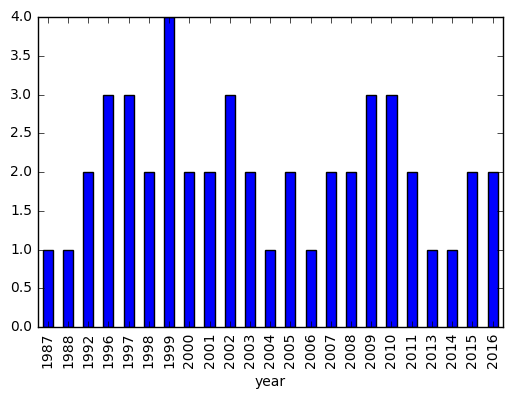

In [205]:
c.groupby(['year']).size().plot(kind = 'bar') # number of movies per year

In [206]:
c.groupby(['year']).n.max() # significance of his roles over the years

year
1987    15
1988     2
1992    23
1996      
1997     2
1998    14
1999      
2000     1
2001    36
2002    17
2003    22
2004     3
2005    15
2006     1
2007     6
2008     5
2009     1
2010      
2011     2
2013     2
2014     1
2015     4
2016     2
Name: n, dtype: object

In [87]:
c.groupby(['title', 'year', 'character']).size()

title                               year  character               
A Very Murray Christmas             2015  George Clooney              1
Batman & Robin                      1997  Batman                      1
                                          Bruce Wayne                 1
Burn After Reading                  2008  Harry Pfarrer               1
Confessions of a Dangerous Mind     2002  Jim Byrd                    1
Curdled                             1996  Seth Gecko                  1
Fantastic Mr. Fox                   2009  Mr. Fox                     1
From Dusk Till Dawn                 1996  Seth Gecko                  1
Good Night, and Good Luck.          2005  Fred Friendly               1
Gravity                             2013  Matt Kowalski               1
Hail, Caesar!                       2016  Baird Whitlock              1
Intolerable Cruelty                 2003  Miles                       1
Leatherheads                        2008  Dodge Connelly             